# Build a music recommender

In [155]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [157]:
df  = pd.read_csv('../data/genres_v2.csv')
df.head()

/var/folders/hk/k6n4s97s1k9fvlxs7gf9ztt00000gn/T/ipykernel_1189/3734353451.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df  = pd.read_csv('../data/genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

<Axes: ylabel='genre'>

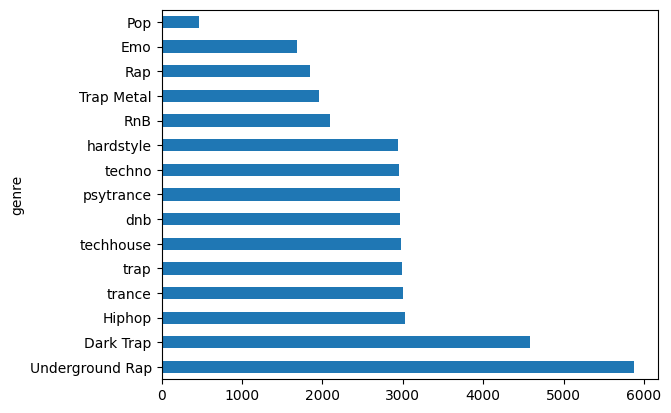

In [159]:
df.genre.value_counts().plot.barh()

In [160]:
feature_df= df.drop(['genre','Unnamed: 0','type','id','uri','track_href','analysis_url','song_name','title'], axis=1)
labels_df = df.genre #.unique()
feature_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


In [161]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [162]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.genre.value_counts()}')

new label count: genre
Dark Trap          5875
Underground Rap    5875
Trap Metal         5875
Emo                5875
Rap                5875
RnB                5875
Pop                5875
Hiphop             5875
techhouse          5875
techno             5875
trance             5875
psytrance          5875
trap               5875
dnb                5875
hardstyle          5875
Name: count, dtype: int64
old label count: genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64


In [163]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dark Trap,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,Dark Trap,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,Dark Trap,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,Dark Trap,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,Dark Trap,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


In [164]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             88125 non-null  object 
 1   danceability      88125 non-null  float64
 2   energy            88125 non-null  float64
 3   key               88125 non-null  int64  
 4   loudness          88125 non-null  float64
 5   mode              88125 non-null  int64  
 6   speechiness       88125 non-null  float64
 7   acousticness      88125 non-null  float64
 8   instrumentalness  88125 non-null  float64
 9   liveness          88125 non-null  float64
 10  valence           88125 non-null  float64
 11  tempo             88125 non-null  float64
 12  duration_ms       88125 non-null  int64  
 13  time_signature    88125 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 9.4+ MB


In [165]:
transformed_df.to_csv("../data/cleaned_music_genre.csv")

In [166]:
!pip install skl2onnx

data = pd.read_csv("../data/cleaned_music_genre.csv")
data.head()

,Unnamed: 0,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Dark Trap,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,1,Dark Trap,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,2,Dark Trap,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,3,Dark Trap,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,4,Dark Trap,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


In [167]:
X = data.iloc[:,2:]
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


In [168]:
y = data[['genre']]
y.head()

,genre
0,Dark Trap
1,Dark Trap
2,Dark Trap
3,Dark Trap
4,Dark Trap


In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [171]:
C = 10
# Create different classifiers.
classifiers = {
    'KNN classifier': KNeighborsClassifier(C),
    'RFC': RandomForestClassifier(n_estimators=100),
    'ADA': AdaBoostClassifier(n_estimators=100)
}

In [172]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

Accuracy (train) for KNN classifier: 40.6% 
Accuracy (train) for RFC: 77.6% 


/Users/wangruiqi/Desktop/CV/ML-For-Beginners /.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy (train) for ADA: 30.4% 


In [173]:

RFC = RandomForestClassifier(n_estimators=100)
music_genre = RFC.fit(X_train, np.ravel(y_train))

accuracy = music_genre.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.7771011422951811


In [174]:
y_pred = music_genre.predict(X_test)

In [175]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

      Dark Trap       0.57      0.47      0.52      1734
            Emo       0.82      0.84      0.83      1734
         Hiphop       0.61      0.55      0.58      1829
            Pop       0.81      0.89      0.85      1779
            Rap       0.66      0.73      0.69      1714
            RnB       0.65      0.63      0.64      1736
     Trap Metal       0.62      0.67      0.64      1750
Underground Rap       0.33      0.29      0.31      1712
            dnb       0.98      0.99      0.98      1788
      hardstyle       0.91      0.95      0.93      1772
      psytrance       0.94      0.95      0.94      1769
      techhouse       0.93      0.95      0.94      1799
         techno       0.92      0.91      0.91      1792
         trance       0.87      0.92      0.89      1728
           trap       0.91      0.89      0.90      1802

       accuracy                           0.78     26438
      macro avg       0.77   

In [176]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_type = [('float_input', FloatTensorType([None, 13]))]
onx = convert_sklearn(music_genre, initial_types=initial_type)
with open("./music_genre_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())